Spectrogram visualization saved as: spectrogram_visualization.png


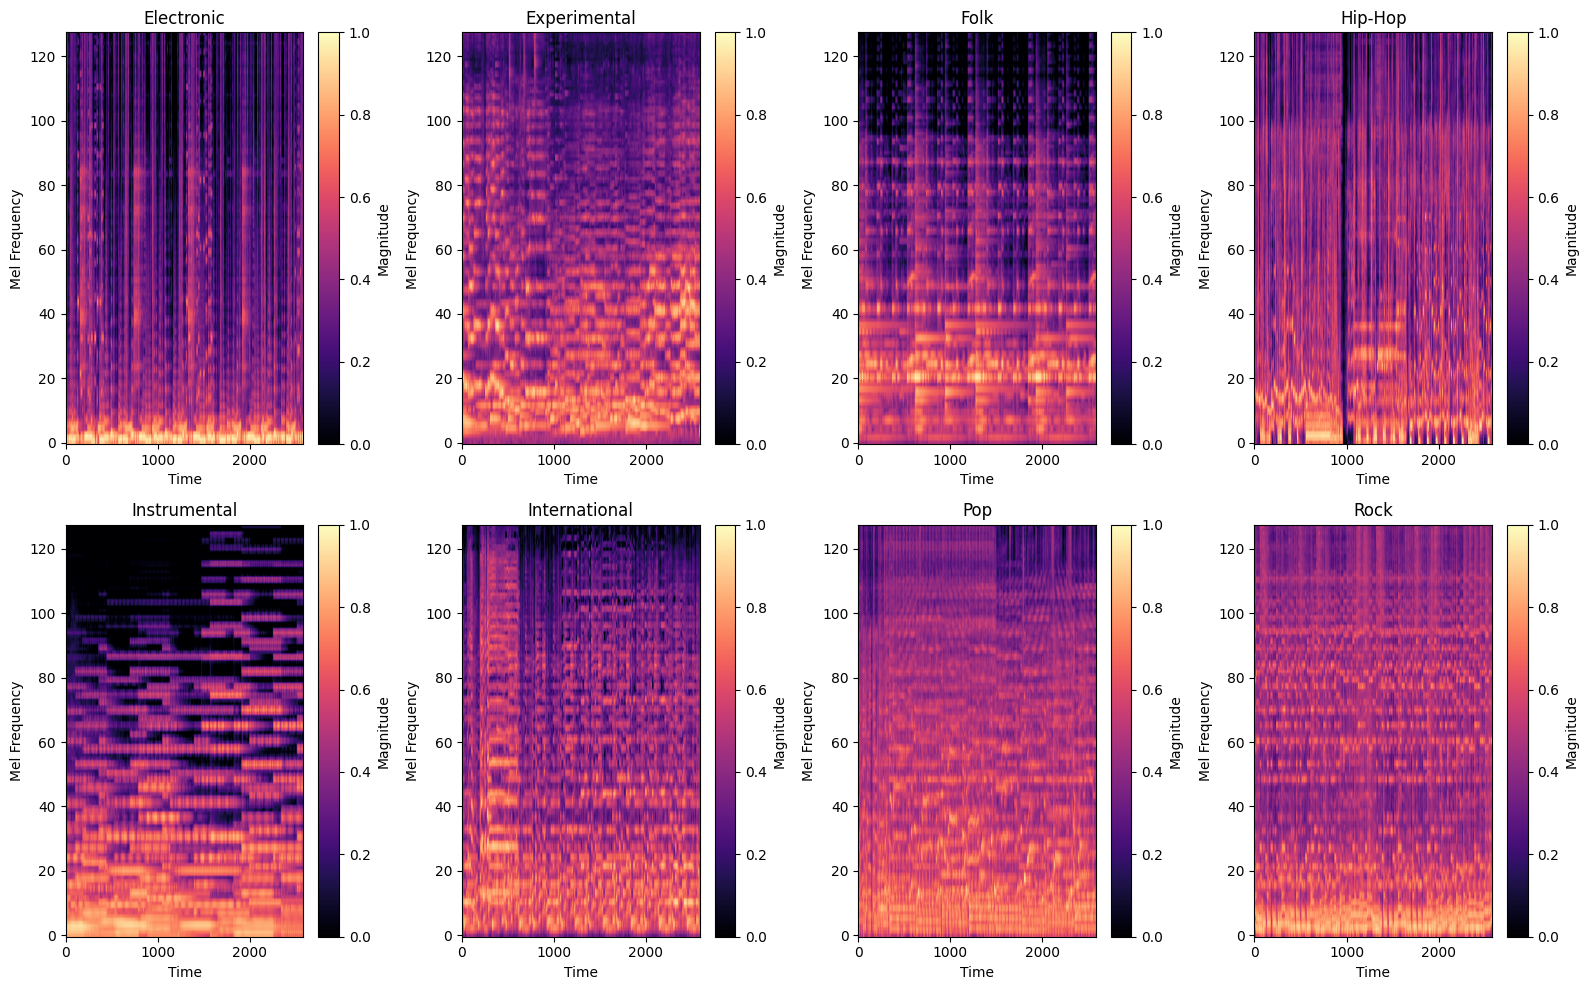

Download the visualization here:


/kaggle/working/spectrogram_visualization.png

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define Dataset Directory and Genre Mapping
data_dir = "/kaggle/input/mel-spectogram-fma/kaggle/working/mel_spectrograms"
genres = ["Electronic", "Experimental", "Folk", "Hip-Hop", 
          "Instrumental", "International", "Pop", "Rock"]

# Function to Load One Sample Spectrogram Per Genre
def load_sample_spectrograms(data_dir, genres):
    sample_spectrograms = {}
    for genre in genres:
        genre_dir = os.path.join(data_dir, genre)
        files = [file for file in os.listdir(genre_dir) if file.endswith('.npy')]
        if files:
            # Load the first file found
            file_path = os.path.join(genre_dir, files[0])
            spectrogram = np.load(file_path)
            sample_spectrograms[genre] = spectrogram
    return sample_spectrograms

# Load Samples
sample_spectrograms = load_sample_spectrograms(data_dir, genres)

# Plot Spectrograms and Save to File
def plot_and_save_spectrograms(sample_spectrograms, output_file="spectrogram_visualization.png"):
    plt.figure(figsize=(16, 10))
    for idx, (genre, spectrogram) in enumerate(sample_spectrograms.items()):
        plt.subplot(2, 4, idx + 1)  # Create a grid: 2 rows x 4 columns
        plt.imshow(spectrogram, aspect='auto', origin='lower', cmap='magma')
        plt.title(genre)
        plt.xlabel("Time")
        plt.ylabel("Mel Frequency")
        plt.colorbar(label="Magnitude")
    plt.tight_layout()
    # Save the figure to a file
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Spectrogram visualization saved as: {output_file}")
    plt.show()

# Generate and Save Visualization
output_file = "spectrogram_visualization.png"
plot_and_save_spectrograms(sample_spectrograms, output_file=output_file)

# Provide Download Link
import shutil
import IPython
from IPython.display import FileLink, display

# Move the file to the current directory for easy download
shutil.move(output_file, f"./{output_file}")

print("Download the visualization here:")
display(FileLink(output_file))
